<a id='top'></a>
# Log completion by ML regression

- Loading and cleaning data with Pandas
    - Data exploration using Matplotlib
    - Basic steps for data cleaning
- Setup scikit-learn workflow
    - Making X and y
- Choosing a model
    - Different options for Regression
- Evaluating model performance
    - Parameter selection and tuning


## More Pandas
---

Load Numpy, Pandas and Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

Define the name of the file to be loaded and use Pandas to read it. Note that the name can be a PATH pointing at the file.

In [4]:
datafile = '../data/training_DataFrame.csv'

Pandas expects by default a column on the file to be an index for each row of values. For this example, column 1 (index = 0) is that column.

In [5]:
wells = pd.read_csv(datafile, index_col=0)

# Data Exploration and cleaning

Before feeding our machines with data to learn from, it's important to make sure that we feed them the best possible data. Pandas has a few methods to explore the contents of the data. The `head()` method shows the top rows of the DataFrame.

In [6]:
wells.head()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
0,0.0,140.0,102.0230,2.9910,0.5520,0.246,0.0
1,0.0,140.1,100.8074,3.0134,0.5596,0.258,0.0
2,0.0,140.2,99.5918,3.0358,0.5672,0.270,0.0
3,0.0,140.3,98.8622,3.0470,0.5686,0.274,0.0
4,0.0,140.4,98.6186,3.0470,0.5638,0.270,0.0


Another useful Pandas method is `describe()`, which compile useful statistics of each numeric column in the `DataFrame`. 

In [7]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,164041.000000,164041.000000,162842.000000,163558.000000,162830.000000,163078.000000,162768.000000
mean,35.084095,281.776399,75.893516,36.998366,0.421645,0.262834,958.301220
std,21.494848,114.089130,25.934663,891.198299,0.086738,0.088723,1120.852391
min,0.000000,0.000000,0.000000,-0.496000,-0.002000,-0.239000,-245.448000
25%,17.000000,201.500000,57.308050,5.045000,0.379800,0.227800,0.000000
50%,34.000000,289.300000,78.559000,8.367000,0.428200,0.267800,0.000000
75%,52.000000,363.100000,95.130000,16.407200,0.473800,0.309400,2226.820000
max,74.000000,615.000000,290.759000,100000.000000,0.722200,1.606000,3043.610000


Note how the `count` row is not the same for all columns? This means that there are some values that Pandas doesn't think they are numbers! (Could be missing values or `NaN`s). There are many strategies to deal with missing data but for this excercise we're just going to ignore the rows that contain these bad values.

In [8]:
wells = wells.dropna()

In [9]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,162353.000000,162353.000000,162353.000000,162353.00000,162353.000000,162353.000000,162353.000000
mean,34.837558,283.862341,76.008393,36.33629,0.422174,0.263171,954.130772
std,21.461413,112.579670,25.875123,893.74899,0.086146,0.088163,1119.205970
min,0.000000,0.000000,0.000000,-0.49600,-0.002000,-0.239000,-245.448000
25%,16.000000,204.900000,57.480800,5.03960,0.380000,0.228000,0.000000
50%,34.000000,290.700000,78.667800,8.34660,0.428400,0.268000,0.000000
75%,52.000000,364.000000,95.174000,16.34400,0.474000,0.309400,2225.626000
max,74.000000,614.900000,290.759000,100000.00000,0.722200,1.606000,3043.610000


Now every column in the `DataFrame` should contain the same number of elements and now we can focus on the statistics themselves. Look at each log property, do those `mean`, `min` and `max` look OK? `ILD` shouldn't have negative values. Let's take them out of our set:

In [11]:
wells.describe()

,well_ID,Depth,GR,ILD,NPHI,DPHI,RHOB
count,162353.000000,162353.000000,162353.000000,162353.00000,162353.000000,162353.000000,162353.000000
mean,34.837558,283.862341,76.008393,36.33629,0.422174,0.263171,954.130772
std,21.461413,112.579670,25.875123,893.74899,0.086146,0.088163,1119.205970
min,0.000000,0.000000,0.000000,-0.49600,-0.002000,-0.239000,-245.448000
25%,16.000000,204.900000,57.480800,5.03960,0.380000,0.228000,0.000000
50%,34.000000,290.700000,78.667800,8.34660,0.428400,0.268000,0.000000
75%,52.000000,364.000000,95.174000,16.34400,0.474000,0.309400,2225.626000
max,74.000000,614.900000,290.759000,100000.00000,0.722200,1.606000,3043.610000


Another typical first approach to explore the data is to study the distribution of values in the dataset...

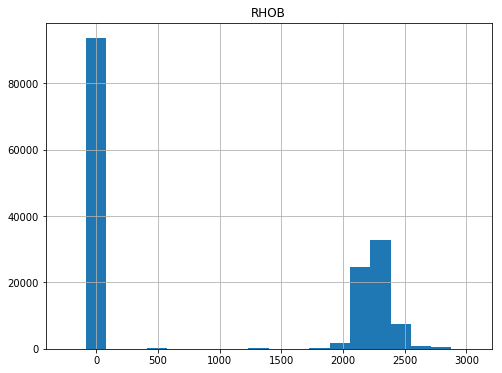

In [12]:
ax = wells.hist(column="RHOB", figsize=(8,6), bins=20)

<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      That distribution doesn't seem right. Can you exclude the `DataFrame` values for which `RHOB` is higher than `1800`?
      </li>
      <p>
    </ul>
</div>

In [9]:
# Put your code here


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
      <li>
      Explore the rest of the `DataFrame`. Do all distributions look OK?
      </li>
      <p>
    </ul>
</div>

Seaborn has a few tricks to display histograms better

In [13]:
import seaborn as sns

In [18]:
wells.ILD.values

array([ 2.991 ,  3.0134,  3.0358, ..., 62.649 , 66.087 , 69.525 ])

/home/castaned/anaconda3/envs/geo_course/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/home/castaned/anaconda3/envs/geo_course/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


ValueError: cannot convert float NaN to integer

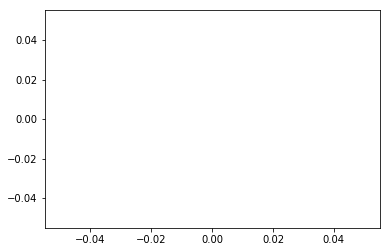

In [17]:
sns.distplot(wells['ILD'])

In [ ]:
# Put your code here
wells['log_ILD'] = np.log10(wells['ILD'])
axs = wells['log_ILD'].hist(bins=20)

In [ ]:
wells = wells[wells.DPHI > 0]

In [ ]:
sns.distplot(wells.DPHI)

# Load testing data

In [14]:
w_train = wells.copy()
w_test = pd.read_csv('../data/testing_DataFrame.csv', index_col=0)
w_test_complete = pd.read_csv('../data/testing_DataFrame_complete.csv', index_col=0)

In [ ]:
w_test.head()

In [ ]:
w_test.describe()

In [ ]:
w_test = w_test[w_test.DPHI > 0]

In [ ]:
w_test_complete = w_test_complete[w_test_complete.DPHI > 0]

In [ ]:
w_test.describe()

Let's start testing our training pipeline with a subset of wells. We can come back to this and change the number of wells we include, to see how it affects the result.

In [ ]:
w_train = w_train[w_train.well_ID < 25]

In [ ]:
# Make X and y
X = w_train[['Depth','GR','ILD','NPHI']].as_matrix()
y = w_train['RHOB'].values

In [ ]:
X.shape

Set up the testing matrix of features we want to use to predict the missing `RHOB`

In [ ]:
X_test = w_test[['Depth','GR','ILD','NPHI']].as_matrix()

We will display the predicted vs. true results for a test well

In [ ]:
well_id = 81

# Available scikit-learn models to choose from:

http://scikit-learn.org/stable/supervised_learning.html

# Linear Regression


A first simple approach is to apply a linear model

In [ ]:
from sklearn import linear_model                

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X,y)

# Make predictions using the testing set
y_test_LR = regr.predict(X_test)

# add a new column to data frame that already exists
w_test_complete['RHOB_pred_LinReg'] = y_test_LR

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_LinReg, my_well.Depth,'r')


# Decision Tree Regressor

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

y_test_DTR = clf.predict(X_test)

In [ ]:
# add a new column to data frame that already exists
w_test_complete['RHOB_pred_DTR'] = y_test_DTR
w_test_complete.head()

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_DTR, my_well.Depth,'r')

# Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
nbrs = KNeighborsRegressor(n_neighbors=5)
nbrs.fit(X, y)
y_test_KNN = nbrs.predict(X_test)

In [ ]:
# add a new column to data frame that already exists
w_test_complete['RHOB_pred_KNN'] = y_test_KNN

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_KNN, my_well.Depth,'r')

# Gradient Boosting Ensemble Regressor

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
    max_depth=5, random_state=0, loss='ls')

est.fit(X, y)

y_test_GBT = est.predict(X_test)
w_test_complete['RHOB_pred_GBT'] = y_test_GBT

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_GBT, my_well.Depth,'r')

# Evaluation Metrics

Although it's good to see how the plots look, a more generalized way to determine how good a model is at predicting data


http://scikit-learn.org/stable/model_selection.html#model-selection

"Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test. Note that the word “experiment” is not intended to denote academic use only, because even in commercial settings machine learning usually starts out experimentally."

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(est, X_test, w_test_complete.RHOB, cv=5, scoring='neg_mean_squared_error')
scores  

## Regression metrics

[TOP](#top)

http://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

In [ ]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_LinReg))  
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_DTR))
print(explained_variance_score(my_well.RHOB, my_well.RHOB_pred_KNN))


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_LinReg))  
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_DTR))
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_KNN))

# Feature Engineering

In [ ]:
def smooth(y, box_len=10):
    box = np.ones(box_len)/box_len
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


In [ ]:
w_train.columns

In [ ]:
w_train["s_NPHI"] = smooth(w_train["NPHI"].values, box_len=50) 

In [ ]:
w_train["well_ID"].unique()

In [ ]:
idx_test_well = 0

In [ ]:
plt.plot(w_train[w_train.well_ID == idx_test_well]["NPHI"])
plt.plot(w_train[w_train.well_ID == idx_test_well]["s_NPHI"])

In [ ]:
w_test["s_NPHI"] = smooth(w_test["NPHI"].values, box_len=50)
X_test = w_test[['Depth','GR','ILD','NPHI','s_NPHI']].as_matrix()

In [ ]:
X = w_train[['Depth','GR','ILD','NPHI','s_NPHI']].as_matrix()

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05,
    max_depth=5, random_state=0, loss='ls')

est.fit(X, y)

y_test_GBT = est.predict(X_test)


w_test_complete['RHOB_pred_GBT'] = y_test_GBT

my_well = w_test_complete[w_test_complete.well_ID==well_id]

plt.figure(figsize=(3,10))
plt.plot(my_well.RHOB, my_well.Depth, 'k')
plt.plot(my_well.RHOB_pred_GBT, my_well.Depth,'r')

In [ ]:
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_GBT)) 

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(my_well.RHOB, my_well.RHOB_pred_GBT))  

<hr />

<p style="color:gray">©2017 Agile Geoscience. Licensed CC-BY.</p>